In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [3]:
data = pd.read_csv('water.csv',sep=',')

In [4]:
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


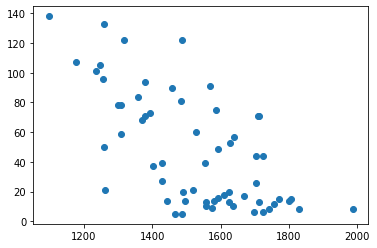

In [5]:
plt.scatter(data.mortality,data.hardness)

In [9]:
print(data[['mortality','hardness']].corr())
print(data[['mortality','hardness']].corr(method='spearman'))

           mortality  hardness
mortality   1.000000 -0.654849
hardness   -0.654849  1.000000
           mortality  hardness
mortality   1.000000 -0.631665
hardness   -0.631665  1.000000


In [10]:
Y=data['mortality']
X=data[['hardness']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

In [12]:
X_train.shape

(48, 1)

In [13]:
y_train.shape

(48,)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
model.coef_

array([-3.28694405])

In [16]:
model.intercept_

1676.8049081969461

In [17]:
y_pred = model.predict(X_test)
y_pred

array([1620.92685931, 1657.08324388, 1647.22241173, 1548.61409017,
       1515.74464965, 1443.4318805 , 1410.56243998, 1344.82355894,
       1643.93546768, 1239.64134928, 1430.2841043 , 1223.20662902,
       1275.79773385])

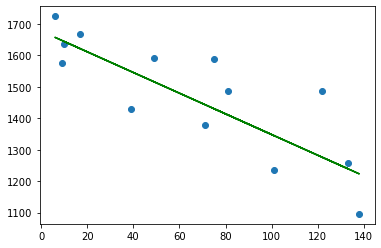

In [18]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred,c='g')

In [19]:
print('R2='+str(model.score(X_test, y_test))) 

R2=0.6687741298180702


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

In [23]:
X_const = sm.add_constant(X_train)

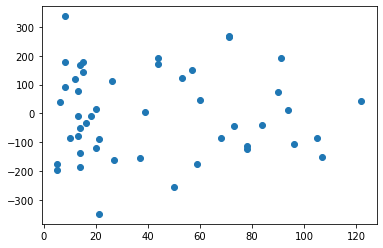

In [25]:
model = sm.OLS(y_train, X_const)
results = model.fit()
plt.scatter(X_const.iloc[:, 1], results.resid)